**Activity:**

We're going to explore a data set from the National UFO Reporting Center that consists of over 80,000 reported UFO sightings over the last 100 years. The data set can be found here: https://www.kaggle.com/hakeemtfrank/ufo-sightings-data-exploration/data. We will use the scrubbed version.

In [43]:
# Read your data here; 
library(ggplot2)
library(tidyr)
library(dplyr)
library(lubridate)
library(plotly)
library(RColorBrewer)

dataframe <- read.csv("scrubbed.csv")
head(dataframe)
summary(dataframe)
str(dataframe)


datetime,city,state,country,shape,duration..seconds.,duration..hours.min.,comments,date.posted,latitude,longitude
10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit,4/27/2004,29.8830556,-97.941111
10/10/1949 21:00,lackland afb,tx,,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.,12/16/2005,29.38421,-98.581082
10/10/1955 17:00,chester (uk/england),,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 England,1/21/2008,53.2,-2.916667
10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home,1/17/2004,28.9783333,-96.645833
10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan,1/22/2004,21.4180556,-157.803611
10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl with us now 51 myself 49 and the other fellow which worked with my father if he&#39s still livi,4/27/2007,36.5950000,-82.188889


             datetime              city           state       country   
 7/4/2010 22:00  :   36   seattle    :  525   ca     : 9655     : 9670  
 7/4/2012 22:00  :   31   phoenix    :  454          : 5797   au:  538  
 11/16/1999 19:00:   27   portland   :  374   wa     : 4268   ca: 3000  
 9/19/2009 20:00 :   26   las vegas  :  368   fl     : 4200   de:  105  
 7/4/2011 22:00  :   25   los angeles:  353   tx     : 3677   gb: 1905  
 10/31/2004 20:00:   23   san diego  :  338   ny     : 3219   us:65114  
 (Other)         :80164   (Other)    :77920   (Other):49516             
      shape       duration..seconds. duration..hours.min.
 light   :16565   300    : 8635      5 minutes : 4716    
 triangle: 7865   120    : 7110      2 minutes : 3500    
 circle  : 7608   600    : 6312      10 minutes: 3322    
 fireball: 6208   60     : 5866      1 minute  : 3061    
 other   : 5649   180    : 5065      3 minutes : 2517    
 unknown : 5584   900    : 4058      30 seconds: 2323    
 (Other) :

'data.frame':	80332 obs. of  11 variables:
 $ datetime            : Factor w/ 69586 levels "1/1/1910 24:00",..: 5486 5487 5488 5489 5490 5491 5492 5493 5494 5495 ...
 $ city                : Factor w/ 19900 levels "&ccedil;anakkale (turkey)",..: 15598 9174 3213 5082 8584 2128 13622 12678 13606 9923 ...
 $ state               : Factor w/ 68 levels "","ab","ak","al",..: 59 59 1 59 15 58 1 10 4 13 ...
 $ country             : Factor w/ 6 levels "","au","ca","de",..: 6 1 5 6 6 6 5 6 6 6 ...
 $ shape               : Factor w/ 30 levels "","changed","changing",..: 10 21 6 6 21 27 6 13 13 13 ...
 $ duration..seconds.  : Factor w/ 537 levels "0.001","0.01",..: 265 471 215 215 518 285 189 83 189 79 ...
 $ duration..hours.min.: Factor w/ 8349 levels " 20 minutes (ongoing)",..: 4593 797 2845 987 1726 4915 6371 2803 3322 8004 ...
 $ comments            : Factor w/ 79998 levels "","  Circle",..: 56884 1738 26127 39976 9992 39647 75545 7610 54657 48776 ...
 $ date.posted         : Factor w/ 317 leve

Our analysis will focus on day, time, and location of sightings. So, we will remove several variables from our dataframe that we won't need. City is included as one we will remove as values are inconsistent, and we'll rely more on geospatial coordinates than named locations. We will leave state and country, and you will see why soon.

In [44]:
data <- dataframe[-c(2,5:9)]
head(data,1)

datetime,state,country,latitude,longitude
10/10/1949 20:30,tx,us,29.8830556,-97.94111


Let's check each unique state and country value.

In [45]:
unique(data$state)
unique(data$country)

[1] tx    hi tn ct al fl ca nc ny ky mi ma ks sc wa ab co nh wi me ga pa il ar
[26] on mo oh in az mn nv nf ne or bc ia va id nm nj mb wv ok ri nb vt la pr ak
[51] ms ut md mt sk wy sd pq ns qc de nd dc nt sa yt yk pe
68 Levels:  ab ak al ar az bc ca co ct dc de fl ga hi ia id il in ks ky ... yt

[1] us    gb ca au de
Levels:  au ca de gb us

As you can see we have some data for reports outside of the US. For the scope of this project we will only look at reportings that occurred in the contiguous 48 United States. We will remove the other reportings from our set.

In [46]:
data_us <- data[which(data$country == 'us' | data$country == ''),]
unique(data_us$country)

[1] us   
Levels:  au ca de gb us

We left reports that had country value of "us" or blank. A blank country space could still be reporting from a state within the US. Now we'll remove all state values that are not continental states in the US.

In [47]:
data_us <- subset(data, data$state != '' & data$state != 'ab' & data$state != 'bc' & data$state != 'mb' & 
                 data$state != 'nb' & data$state != 'nf' & data$state != 'ns' & data$state != 'nt' &
                 data$state != 'on' & data$state != 'pe' & data$state != 'pq' & data$state != 'qc' &
                 data$state != 'sa' & data$state != 'sk' & data$state != 'yk' & data$state != 'yt' & 
                 data$state != 'pr' & data$state != 'hi' & data$state != 'ak')

unique(data_us$state)

[1] tx tn ct al fl ca nc ny ky mi ma ks sc wa co nh wi me ga pa il ar mo oh in
[26] az mn nv ne or ia va id nm nj wv ok ri vt la ms ut md mt wy sd de nd dc
68 Levels:  ab ak al ar az bc ca co ct dc de fl ga hi ia id il in ks ky ... yt

Now, let's break up that timestamp into date and time.

In [48]:
data_us$date <- sapply(strsplit(as.character(data_us$datetime), " "), "[", 1)
data_us$time <- sapply(strsplit(as.character(data_us$datetime), " "), "[", 2)
data_us <- data_us[-c(1)]
head(data_us,1)

state,country,latitude,longitude,date,time
tx,us,29.8830556,-97.94111,10/10/1949,20:30


Next we'll convert date into a datetime object.

In [49]:
data_us$date <- mdy(data_us$date)
head(data_us,1)

state,country,latitude,longitude,date,time
tx,us,29.8830556,-97.94111,1949-10-10,20:30


And then we'll split date into 3 different variables: year, month, day. And we'll convert month and day from their numerical values to their named values for more intuitive analysis.

In [50]:
data_us$year <- year(data_us$date)
data_us$month <- month(data_us$date, label = TRUE)
data_us$day <- wday(data_us$date, label = TRUE)
head(data_us,1)

state,country,latitude,longitude,date,time,year,month,day
tx,us,29.8830556,-97.94111,1949-10-10,20:30,1949,Oct,Mon


Next, we will pull the hour each sighting ocurred out of our time values. This will allow us to group sightings into a particular hour of the day. Note we are removing any hour that comes out as "24". This means the time value had something like "24:18". Military and emergency personnel refer to the midnight hour both as 24:00 and 00:00, but this leaves our data with a certain level of ambiguity and uncertainty. How do we know the correct day was recorded with this 24:00 time? To compensate for this, we will remove these values from our analysis.

In [51]:
data_us$hour <- vapply(strsplit(data_us$time,":"), `[`, 1, FUN.VALUE=character(1))
data_us$hour <- as.numeric(as.character(data_us$hour))
data_us <- filter(data_us, data_us$hour != 24)
head(data_us,1)
unique(data_us$hour)

state,country,latitude,longitude,date,time,year,month,day,hour
tx,us,29.8830556,-97.94111,1949-10-10,20:30,1949,Oct,Mon,20


[1] 20 21 19 23 13 16 22 17 12  2  0  5 18 15  3  4  6 11  9  8 14  7  1 10

We are almost ready to analyze our data. But if you recall from when we first took a look at this data set, latitude was a factor. We'll need to convert this variable to numeric in order to do geospatial visualizations.

In [52]:
data_us$latitude <- as.numeric(as.character(data_us$latitude))
head(data_us,1)
str(data_us$latitude)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

state,country,latitude,longitude,date,time,year,month,day,hour
tx,us,29.88306,-97.94111,1949-10-10,20:30,1949,Oct,Mon,20


 num [1:69661] 29.9 29.4 29 36.6 41.1 ...


Let's add one more variable. It might be interesting to compare sightings by decade. We'll add this below.

In [53]:
data_us$decade <- (c(data_us$year) %/% 10) * 10
head(data_us,3)

state,country,latitude,longitude,date,time,year,month,day,hour,decade
tx,us,29.88306,-97.94111,1949-10-10,20:30,1949,Oct,Mon,20,1940
tx,,29.38421,-98.58108,1949-10-10,21:00,1949,Oct,Mon,21,1940
tx,us,28.97833,-96.64583,1956-10-10,21:00,1956,Oct,Wed,21,1950


But we should be wary of incomplete decades if we do this analysis. Let's very the first and last years in our data.

In [72]:
min(data_us$year)
max(data_us$year)

[1] 1910

[1] 2014

Ok so our first decade, the 1910s, is complete, but our last decade, the 2010s, is missing half the decade (partially because some of those years haven't happened yet). We'll need to keep this in mind if we look at decades.

Alright, just a little more tidying up. We only have sightings from the contiguous US, so let's remove the country variable, and standardize our state values.

In [54]:
df <- data_us[-c(2)]
df$state <- toupper(df$state)
head(df)
summary(df)
str(df)
dim(df)

state,latitude,longitude,date,time,year,month,day,hour,decade
TX,29.88306,-97.94111,1949-10-10,20:30,1949,Oct,Mon,20,1940
TX,29.38421,-98.58108,1949-10-10,21:00,1949,Oct,Mon,21,1940
TX,28.97833,-96.64583,1956-10-10,21:00,1956,Oct,Wed,21,1950
TN,36.59500,-82.18889,1961-10-10,19:00,1961,Oct,Tue,19,1960
CT,41.11750,-73.40833,1965-10-10,23:45,1965,Oct,Sun,23,1960
AL,33.58611,-86.28611,1966-10-10,20:00,1966,Oct,Mon,20,1960


    state              latitude        longitude            date           
 Length:69661       Min.   :-46.16   Min.   :-141.24   Min.   :1910-06-01  
 Class :character   1st Qu.: 34.14   1st Qu.:-113.93   1st Qu.:2001-08-14  
 Mode  :character   Median : 38.96   Median : -89.65   Median :2007-02-28  
                    Mean   : 38.30   Mean   : -94.98   Mean   :2004-07-07  
                    3rd Qu.: 41.90   3rd Qu.: -80.74   3rd Qu.:2011-08-02  
                    Max.   : 61.91   Max.   : 169.88   Max.   :2014-05-08  
                    NA's   :1                                              
     time                year          month        day             hour      
 Length:69661       Min.   :1910   Jul    : 8311   Sun:10095   Min.   : 0.00  
 Class :character   1st Qu.:2001   Aug    : 7354   Mon: 8705   1st Qu.:11.00  
 Mode  :character   Median :2007   Jun    : 6919   Tue: 9447   Median :19.00  
                    Mean   :2004   Oct    : 6620   Wed: 9582   Mean   :15.74

'data.frame':	69661 obs. of  10 variables:
 $ state    : chr  "TX" "TX" "TX" "TN" ...
 $ latitude : num  29.9 29.4 29 36.6 41.1 ...
 $ longitude: num  -97.9 -98.6 -96.6 -82.2 -73.4 ...
 $ date     : Date, format: "1949-10-10" "1949-10-10" ...
 $ time     : chr  "20:30" "21:00" "21:00" "19:00" ...
 $ year     : num  1949 1949 1956 1961 1965 ...
 $ month    : Ord.factor w/ 12 levels "Jan"<"Feb"<"Mar"<..: 10 10 10 10 10 10 10 10 10 10 ...
 $ day      : Ord.factor w/ 7 levels "Sun"<"Mon"<"Tue"<..: 2 2 4 3 1 2 2 5 5 7 ...
 $ hour     : num  20 21 21 19 23 20 21 13 19 16 ...
 $ decade   : num  1940 1940 1950 1960 1960 1960 1960 1960 1960 1970 ...


[1] 69661    10

Our dataframe is down to slightly less than 70,000 sightings, still a good sized data set. Let's move on to visualization analysis.

First let's compare decades. You'll see above that the decade values are numeric. We nee to convert them to factors for this visualization.

In [55]:
dfp1 <- df
dfp1$decade <- as.factor(dfp1$decade)
head(dfp1)
str(dfp1$decade)

state,latitude,longitude,date,time,year,month,day,hour,decade
TX,29.88306,-97.94111,1949-10-10,20:30,1949,Oct,Mon,20,1940
TX,29.38421,-98.58108,1949-10-10,21:00,1949,Oct,Mon,21,1940
TX,28.97833,-96.64583,1956-10-10,21:00,1956,Oct,Wed,21,1950
TN,36.59500,-82.18889,1961-10-10,19:00,1961,Oct,Tue,19,1960
CT,41.11750,-73.40833,1965-10-10,23:45,1965,Oct,Sun,23,1960
AL,33.58611,-86.28611,1966-10-10,20:00,1966,Oct,Mon,20,1960


 Factor w/ 11 levels "1910","1920",..: 4 4 5 6 6 6 6 6 6 7 ...


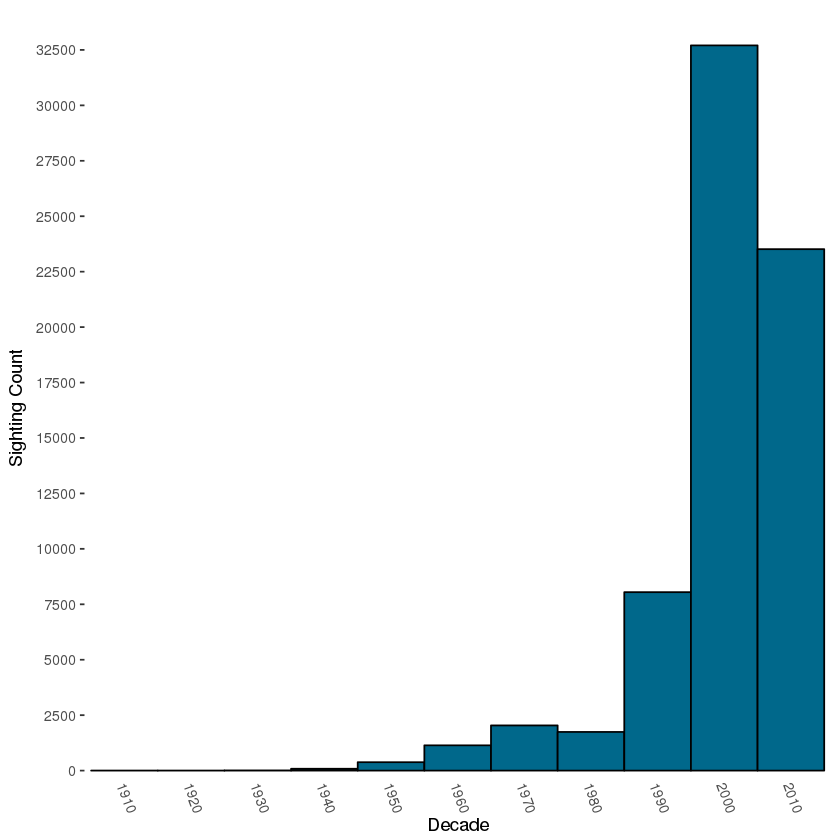

In [69]:
ggplot(dfp1, aes(x=decade))+geom_bar(width=1, color='black', fill='deepskyblue4') + xlab("Decade") + 
    ylab("Sighting Count")+ guides(fill=guide_legend(title="Decade"))+
theme_bw() + 
theme(axis.text.x= element_text(angle=290, hjust=-.2, margin=margin(t=-22)), axis.ticks.x=element_blank(), 
     panel.border = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
scale_y_continuous(breaks= seq(0,40000,2500))



Ok. So sightings reports have been increasing since the beginning of the century, with a slight dip from the 70s to the 80s, but REALLY taking off again in the 2000s. Additionally we can see the 2010s already have more than half of the 2010s, and that only goes through 2014. So at this rate the 2010s will have more reported sightings than the 2000s.

Next lets look at sightings per state, and add per decade for a little context.

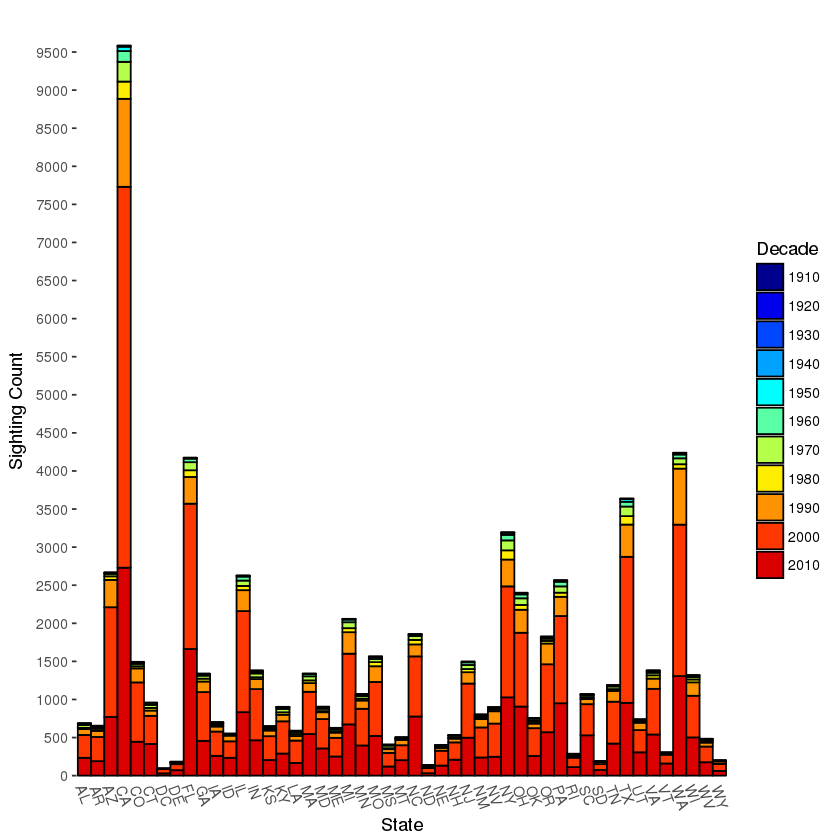

In [65]:

ggplot(dfp1, aes(x=state))+geom_bar(width=1, color='black', mapping=aes(fill=decade)) + xlab("State") + 
    ylab("Sighting Count")+ guides(fill=guide_legend(title="Decade"))+
scale_fill_manual(values=c("#00008F", "#0000EA", "#0047FF", "#00A2FF", "#00FEFF", "#5AFFA5", "#B5FF4A", "#FFED00", "#FF9200", "#FF3700", "#DB0000"))+
theme_bw() + 
theme(axis.text.x= element_text(angle=290, hjust=-.2, margin=margin(t=-22)), axis.ticks.x=element_blank(), 
     panel.border = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
scale_y_continuous(breaks= seq(0,9500,500))



There's a lot of data to take in here, but I would say there are no obvious outliers.

Next we'll look at hours of the day that sightings are reported.

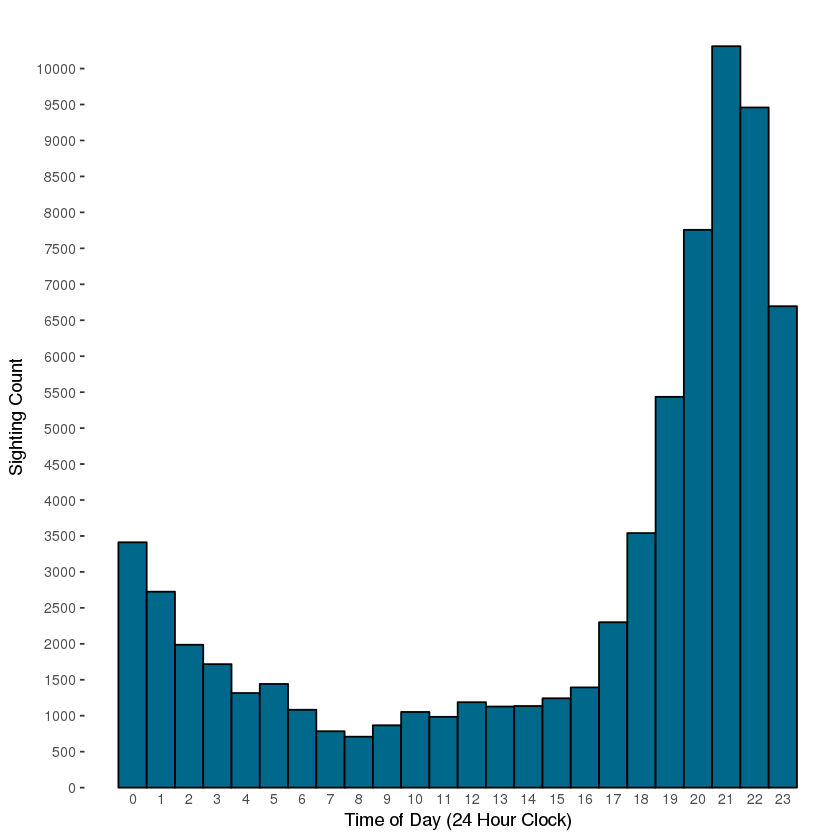

In [57]:

plot2 <- ggplot(df, aes(x=hour))+geom_bar(width=1, colour="black", fill="deepskyblue4")+ xlab("Time of Day (24 Hour Clock)")+
    ylab("Sighting Count")
plot2 +
theme_bw() + 
theme(axis.text.x= element_text(margin=margin(t=-22)), axis.ticks.x=element_blank(), 
     panel.border = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank()) + 
scale_x_continuous(breaks= seq(0,23,1))+
scale_y_continuous(breaks= seq(0,10000,500))


So we see there is a gradual increase that peaks at 9pm.

Now let's examine months of the year, and include days of the week. 

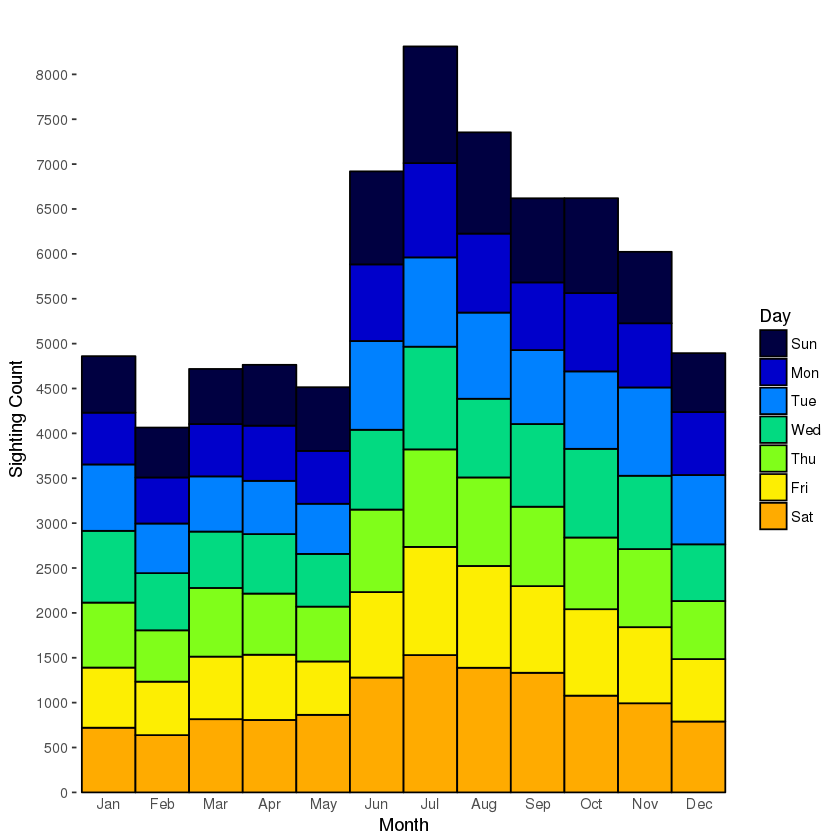

In [58]:

plot3 <- ggplot(df, aes(x=month))+geom_bar(width=1, colour="black", mapping=aes(fill=day))+ xlab("Month")+ ylab("Sighting Count")+
    guides(fill=guide_legend(title="Day"))
plot3 +
theme_bw() + 
scale_fill_manual(values=c("#000041", "#0000CB", "#0081FF", "#02DA81", "#80FE1A", "#FDEE02", "#FFAB00"))+
theme(axis.text.x= element_text(margin=margin(t=-22)), axis.ticks.x=element_blank(), 
     panel.border = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
scale_y_continuous(breaks= seq(0,8000,500))


This visualization is showing us that sightings are more prevelent in the summer and fall, and most often occur on Saturdays.

And finally, we'll create a density plot of sightings on a map of the continental US.

In [59]:
library(ggmap)
library(maps)
library(mapdata)

In [60]:
states <- map_data("state")
map <- ggplot(data = states) + geom_polygon(aes(x = long, y = lat, group = group), color = "grey") + coord_fixed(1.3)

Warning message:
"Removed 1 rows containing non-finite values (stat_density2d)."

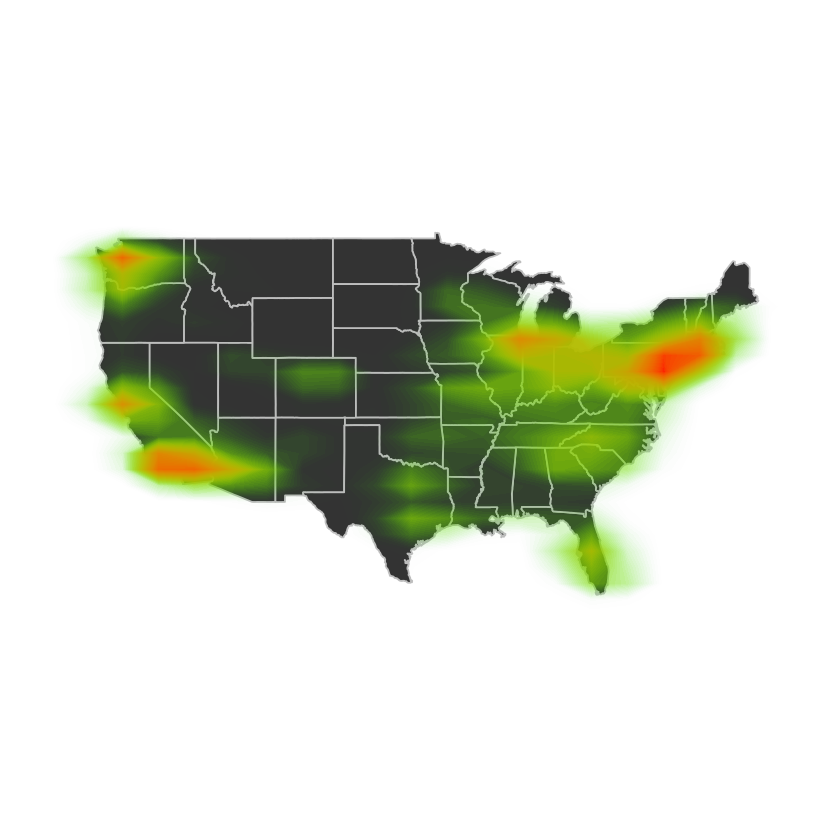

In [61]:

map +
stat_density2d(data = df, aes(x = longitude, y = latitude, fill = ..level.., alpha = ..level..),
               size = 10, bins = 80, geom = "polygon") + 
scale_fill_gradient(low = "green", high = "red") + 
scale_alpha(range = c(0, 0.35), guide = FALSE) +
theme_bw() +
theme(panel.border = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
      axis.line = element_blank(), axis.text.x = element_blank(), axis.text.y = element_blank(),
      axis.ticks = element_blank(), axis.title.x=element_blank(), axis.title.y=element_blank(),
      legend.position="none")


In summation, it is my opinion that UFO sightings are most often reported on summer weekend evenings in the North East and South West. Or, in other words, in the most populated areas of the country, at the times of year and week that most people are outdoors or "out and about", and times of day that skys are darkening, but before too many people are in bed. An infographic will be created to illustrate the findings of this analysis.